##  Handwritten Digit Recognition 
### Fully Connected Deep Neural Networks with keras

1. [Goal](#goal)  
2. [Data](#dat)  
3. [Packages](#packages)   
4. [Load Data](#loaddata)    
5. [Display Images](#plotimages)    
6. [Preprocess data](#preprocess)  
7. [Build Neural Network](#nn) 
8. [Model Configuration](#cong) 
9. [Model Training](#train) 

<a id='goal'></a>
## Goal  
Identify digit from images of handwritten single digits.  
There are 10 digits (0 to 9) or 10 classes to predict. 

<a id='data'></a>

## Data  
MNIST dataset for handwritten digit recognition.The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Each image is 784 pixels (28*28)

<a id='packages'></a>
## Packages 

- Keras:  It is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
- TensorFlow: In order to use keras we need Tensorflow because keras uses Tensorflow.

### Install required Libraries

In [1]:
# Install below libraries if you don't have them.
#!pip install keras
#!pip install tensorflow

### Import Reuired Librabries

In [2]:
import keras
# Import data set mnist from Keras datasets
from keras.datasets import mnist

# We will be using sequential model to which we will be passing differnt layers 
from keras.models import Sequential

# For this example we will be using Dense layer - Each neuron recieve inputs from all the neurons in the 
# previous layer, thus densely connected.
from keras.layers import Dense

# Stochastic gradient descent optimizer will help us to reduce the error.
from keras.optimizers import SGD

# To plot images
import matplotlib.pyplot as plt


Using TensorFlow backend.


<a id='loaddata'></a>
## Load Data

In [3]:
# load data into train and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('Input Train Set',X_train.shape)
print('Input Test Set',X_test.shape)

print('Target Train Set',y_train.shape)
print('Target Test Set',y_test.shape)

Input Train Set (60000, 28, 28)
Input Test Set (10000, 28, 28)
Target Train Set (60000,)
Target Test Set (10000,)


**Train Set:**
We have We have 60000 differnt images of handwritten digitis from 0-9 and each image is of size (28,28)  
**Test Set:**
We have We have 10000 differnt images of handwritten digitis from 0-9 and each image is of size (28,28)

<a id='plotimages'></a>
## Display Images 

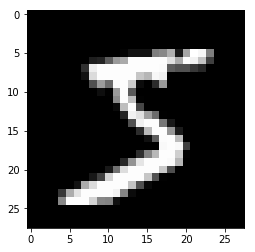

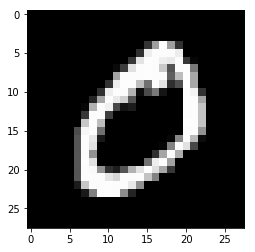

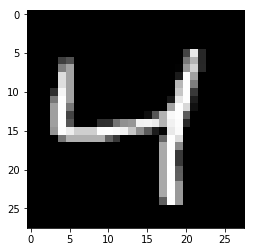

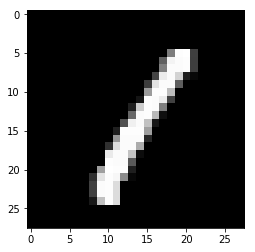

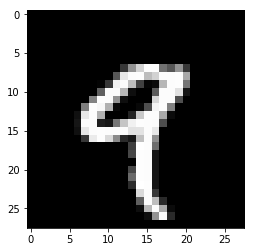

In [5]:
for i in range(0,5):
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.show()

<a id='preprocess'></a>
## Preprocess data
**1.Convert From 2D to 1D**    
Converting 2D array of 28x28 dimensions into one flat array of 784 dimentions.  

**2.Scaling RGB Values 0-1**    
Usaually RGB Values are between 0-255. We will normalize them to scale 0-1. 

**3.One hot encoding of target feature**  
Encode target feature using a one-hot aka one-of-K scheme. In out case K=10 each image can take value between 0-9. Suppose we have image of handwritten digit 4 then on hot encoded feature will look like. [0,0,0,0,1,0,0,0,0,0]

In [6]:
# Convert from 2D to 1D 
X_train=X_train.reshape(60000,784).astype('float32')
X_test=X_test.reshape(10000,784).astype('float32')

In [7]:
# Convert Darkeness from 0 to 255 --> 0 to 1
X_train /=255
X_test/=255

In [8]:
#One Hot Encoding
N_classes=10
y_train=keras.utils.to_categorical(y_train,N_classes)
y_test=keras.utils.to_categorical(y_test,N_classes)

<a id='nn'></a>
## Build Neural Network

In [9]:
# all layers feed into one another  i.e Sequential model
model= Sequential()
# Add Hidden Layer
model.add(Dense((100),activation='relu',input_shape=(784,)))
model.add(Dense((200),activation='relu'))
# Add Output layer
model.add(Dense((10),activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


<a id='cong'></a>
## Model Configuration

In [11]:
#model.compile(loss='mean_squared_error',optimizer=SGD(lr=0.8),metrics=['accuracy'])
model.compile(loss='mean_squared_error',optimizer=SGD(lr=1.0),metrics=['accuracy'])

In [12]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs/digits',write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

<a id='train'></a>
## Train Model

In [13]:
model.fit(X_train,y_train,batch_size=128,validation_data=(X_test,y_test),epochs=100,callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.0319 - acc: 0.7815 - val_loss: 0.0138 - val_acc: 0.9108
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.0130 - acc: 0.9158 - val_loss: 0.0115 - val_acc: 0.9246
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.0108 - acc: 0.9308 - val_loss: 0.0099 - val_acc: 0.9370
Epoch 4/100
60000/60000 [==============================] - 2s - loss: 0.0093 - acc: 0.9404 - val_loss: 0.0092 - val_acc: 0.9416
Epoch 5/100
60000/60000 [==============================] - 2s - loss: 0.0083 - acc: 0.9480 - val_loss: 0.0079 - val_acc: 0.9500
Epoch 6/100
60000/60000 [==============================] - 2s - loss: 0.0074 - acc: 0.9538 - val_loss: 0.0074 - val_acc: 0.9526
Epoch 7/100
60000/60000 [==============================] - 2s - loss: 0.0067 - acc: 0.9581 - val_loss: 0.0070 - val_acc: 0.9540
Epoch 8/100
60000/60000 [=============================

60000/60000 [==============================] - 1s - loss: 6.8748e-04 - acc: 0.9967 - val_loss: 0.0035 - val_acc: 0.9763
Epoch 64/100
60000/60000 [==============================] - 1s - loss: 6.7365e-04 - acc: 0.9967 - val_loss: 0.0034 - val_acc: 0.9780
Epoch 65/100
60000/60000 [==============================] - 1s - loss: 6.5870e-04 - acc: 0.9967 - val_loss: 0.0035 - val_acc: 0.9773
Epoch 66/100
60000/60000 [==============================] - 2s - loss: 6.5100e-04 - acc: 0.9968 - val_loss: 0.0034 - val_acc: 0.9775
Epoch 67/100
60000/60000 [==============================] - 2s - loss: 6.3553e-04 - acc: 0.9969 - val_loss: 0.0034 - val_acc: 0.9780
Epoch 68/100
60000/60000 [==============================] - 2s - loss: 6.2401e-04 - acc: 0.9969 - val_loss: 0.0034 - val_acc: 0.9781
Epoch 69/100
60000/60000 [==============================] - 2s - loss: 6.1551e-04 - acc: 0.9969 - val_loss: 0.0034 - val_acc: 0.9775
Epoch 70/100
60000/60000 [==============================] - 2s - loss: 6.0950e-04 